In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv('sales.csv')


In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
list(df.columns)

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [9]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
df['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
df = df.drop(columns='Invoice ID')

In [14]:
df = df.drop(columns='Tax 5%')

In [15]:
df = df.drop(columns='gross margin percentage')

In [16]:
df = df.drop(columns='Date')

In [17]:
df = df.drop(columns='Time')

In [18]:
for column in ['Unit price','Quantity','Total','cogs','gross income','Rating']:
    df[column]= (df[column]-df[column].mean())/df[column].std()
normalized_df = df

In [19]:
normalized_df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,0.717801,0.509675,0.919147,Ewallet,0.919147,0.919147,1.237824
1,C,Naypyitaw,Normal,Female,Electronic accessories,-1.524540,-0.174453,-0.987236,Cash,-0.987236,-0.987236,1.528762
2,A,Yangon,Normal,Male,Home and lifestyle,-0.352605,0.509675,0.071410,Credit card,0.071410,0.071410,0.248635
3,A,Yangon,Member,Male,Health and beauty,0.096166,0.851739,0.675442,Ewallet,0.675442,0.675442,0.830511
4,A,Yangon,Normal,Male,Sports and travel,1.156380,0.509675,1.266492,Ewallet,1.266492,1.266492,-0.973303
...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,-0.578311,-1.542708,-1.141179,Ewallet,-1.141179,-1.141179,-0.449615
996,B,Mandalay,Normal,Female,Home and lifestyle,1.574201,1.535867,2.844917,Ewallet,2.844917,2.844917,-1.496991
997,A,Yangon,Member,Male,Food and beverages,-0.899508,-1.542708,-1.177519,Cash,-1.177519,-1.177519,0.423198
998,A,Yangon,Normal,Male,Home and lifestyle,0.383016,-1.542708,-1.032415,Cash,-1.032415,-1.032415,-1.671554


In [20]:
le_branch = preprocessing.LabelEncoder()
normalized_df['Branch'] = le_branch.fit_transform(normalized_df['Branch'])

In [21]:
le_gender = preprocessing.LabelEncoder()
normalized_df['Gender'] = le_gender.fit_transform(normalized_df['Gender'])
le_city = preprocessing.LabelEncoder()
normalized_df['City'] = le_city.fit_transform(normalized_df['City'])
le_payment = preprocessing.LabelEncoder()
normalized_df['Payment'] = le_payment.fit_transform(normalized_df['Payment'])

In [22]:
le_customer_type = preprocessing.LabelEncoder()
normalized_df['Customer type'] = le_customer_type.fit_transform(normalized_df['Customer type'])

In [23]:
le_product = preprocessing.LabelEncoder()
normalized_df['Product line'] = le_product.fit_transform(normalized_df['Product line'])

In [24]:
normalized_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross income,Rating
0,0,2,0,0,3,0.717801,0.509675,0.919147,2,0.919147,0.919147,1.237824
1,2,1,1,0,0,-1.524540,-0.174453,-0.987236,0,-0.987236,-0.987236,1.528762
2,0,2,1,1,4,-0.352605,0.509675,0.071410,1,0.071410,0.071410,0.248635
3,0,2,0,1,3,0.096166,0.851739,0.675442,2,0.675442,0.675442,0.830511
4,0,2,1,1,5,1.156380,0.509675,1.266492,2,1.266492,1.266492,-0.973303


#### Defining X and Y

In [25]:
y=normalized_df['Customer type']
x=normalized_df.drop('Customer type',axis=1)

In [26]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Customer type, dtype: int32

#### Spliting data

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [28]:
x_train.head()

,Branch,City,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross income,Rating
687,0,2,1,4,0.297716,1.535867,1.400707,0,1.400707,1.400707,-1.555179
500,1,0,1,5,0.690626,-1.542708,-0.997612,1,-0.997612,-0.997612,-0.915116
332,0,2,1,1,0.805743,-0.174453,0.331001,0,0.331001,0.331001,-0.856928
979,1,0,0,2,0.456616,-1.542708,-1.024088,1,-1.024088,-1.024088,-0.275053
817,0,2,1,2,-0.822511,0.851739,-0.156068,2,-0.156068,-0.156068,1.528762


In [29]:
y_train.head()

687    0
500    0
332    1
979    1
817    1
Name: Customer type, dtype: int32

### Model Implementation

In [30]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score , mean_squared_error


### Knn

In [31]:

knn7=KNeighborsClassifier(n_neighbors=7)
knn7.fit(x_train,y_train)

y_pred7=knn7.predict(x_test)

print(classification_report(y_test,y_pred7))


              precision    recall  f1-score   support

           0       0.52      0.59      0.55        99
           1       0.54      0.48      0.51       101

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



In [32]:
print("Training Accuracy",knn7.score(x_train,y_train)*100)


Training Accuracy 62.875


[[58 41]
 [53 48]]


Text(0.5, 1.0, 'Knn , n = 7')

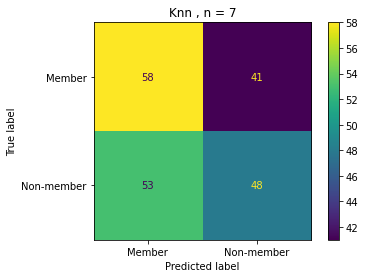

In [33]:
print(confusion_matrix(y_test,y_pred7))

cm = confusion_matrix(y_test, y_pred7)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Member','Non-member'])
cmd.plot()
cmd.ax_.set_title("Knn , n = 7")


In [34]:
accuracy_score(y_test, y_pred7)*100

53.0

#### K = 5

In [35]:
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train,y_train)
y_pred5=knn5.predict(x_test)

print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57        99
           1       0.56      0.49      0.52       101

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.54       200



In [36]:
print("Training Accuracy",knn5.score(x_train,y_train)*100)

Training Accuracy 65.625


Text(0.5, 1.0, 'Knn , n = 5')

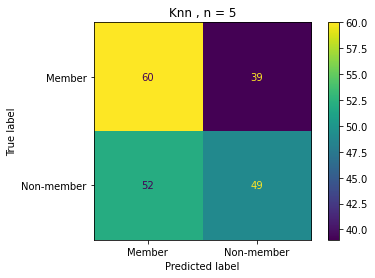

In [37]:
cm = confusion_matrix(y_test, y_pred5)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Member','Non-member'])
cmd.plot()
cmd.ax_.set_title("Knn , n = 5")

In [38]:
accuracy_score(y_test, y_pred5)*100

54.50000000000001

### Decision Tree Classifier

In [39]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=125,criterion='entropy')
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=125)

              precision    recall  f1-score   support

           0       0.50      0.66      0.57        99
           1       0.51      0.35      0.41       101

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.49       200

Confusion Matrix
[[65 34]
 [66 35]]
Training Accuracy 56.25


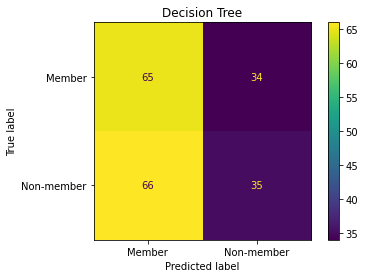

In [40]:
y_pred=decision_tree.predict(x_test)
print(classification_report(y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Member','Non-member'])
cmd.plot()
cmd.ax_.set_title("Decision Tree" )

print("Training Accuracy",decision_tree.score(x_train,y_train)*100)

In [41]:
print("Test Accuracy score from Matrix",accuracy_score(y_test, y_pred)*100)

Test Accuracy score from Matrix 50.0


### Random Forest Classifier

In [42]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.50      0.59      0.54        99
           1       0.51      0.43      0.46       101

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

[[58 41]
 [58 43]]
Training Accuracy 100.0


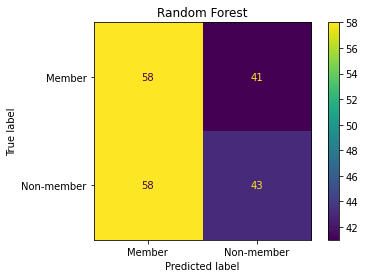

In [43]:
y_pred=random_forest.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Member','Non-member'])
cmd.plot()
cmd.ax_.set_title("Random Forest" )


print("Training Accuracy",random_forest.score(x_train,y_train)*100)

In [44]:
print("Test Accuracy score from Matrix",accuracy_score(y_test, y_pred)*100)

Test Accuracy score from Matrix 50.5
